In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from itertools import combinations, permutations
from time import time
import pandas as pd
from numpy.random import random
from fare.metrics import *
# from fare.metrics import _count_inversions,_merge_parity
# from orig_agg_util import *
#np.random.seed(890)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(seed=867)

In [9]:
# p = 0.5 -> random, fair
# p large -> unfair favors g1
def gen_groups(n, p):
    len1 = int(n/2)
    len0 = n - len1
    groups = []
    while len1 > 0 and len0 >0:
        if random() < p: 
            groups.append(1)
            len1 -= 1
        else:
            groups.append(-1)
            len0 -= 1
    while len1 > 0:
        groups.append(1)
        len1 -= 1
    while len0 >0:
        groups.append(-1)
        len0 -= 1
    return groups
    

In [10]:
def get_ranks_groups_c(rank_len, n_ranks, groups,p,theta):
    r = []
    ranks = np.genfromtxt("data/R_n"+str(rank_len)+"_N"+str(n_ranks)+"_t"+str(theta)+".txt", delimiter=',')
    for rank in ranks:
        g = [groups[int(x-1)]*x for x in rank]
        # for colors
        # r.append(g*rank)
        r.append(g)
    return r

In [11]:
def get_ranks_groups_c2(rank_len, n_ranks, groups,p,theta):
    r = []
    c = []
    ranks = np.genfromtxt("data/R_n"+str(rank_len)+"_N"+str(n_ranks)+"_t"+str(theta)+".txt", delimiter=',')
    for rank in ranks:
        g_c = [groups[int(x-1)]*x for x in rank]
        # for colors
        # r.append(g*rank)
        r.append(rank)
        c.append(g_c)
    return r, c

In [12]:
def plot_thetas_c(n_ranks,rank_len,p,ylabel,filename,ts=False,hidex=False):
    thetas = [0.001, 0.1, 0.25, 1.0]
    ws = np.repeat(10, len(thetas))
    ws = np.insert(ws,0,1)
    fig, axs = plt.subplots(1, len(thetas)+1, sharey=True, 
                            gridspec_kw={'width_ratios':ws})
    groups = gen_groups(rank_len, p)
    g = [] 
    groups_c = [x*i for i,x in enumerate(groups)]
    g.append(groups_c)
    axs[0].imshow(np.transpose(g), cmap='PiYG', interpolation='nearest')
    axs[0].set_xticks([])
    axs[0].set_yticks([0,10,20,30,39])
    axs[0].set_yticklabels([0,10,20,30,40],fontsize=14)
    axs[0].set_ylabel(ylabel, fontsize=18)
#     axs[0].set_title(" ", fontsize=18)
#     axs[0].set_xlabel(" ", fontsize=14)
    for i,theta in enumerate(thetas):
        r = get_ranks_groups_c(rank_len, n_ranks, groups, p, theta)

        axs[i+1].imshow(np.transpose(r), cmap='PiYG', interpolation='nearest')
        if hidex:
            axs[i+1].set_xticks([])
        else:
            axs[i+1].set_xticks([0,10,19])
            axs[i+1].set_xticklabels([0,10,20],fontsize=14)
        if ts:
            axs[i+1].set_title(r'$\theta = $'+str(theta), fontsize=18)
#     plt.savefig(filename, bbox_inches='tight')
    plt.show()

In [13]:
def get_ranks_groups(rank_len, n_ranks, groups,p,theta):
    r = []
    ranks = np.genfromtxt("data/R_n"+str(rank_len)+"_N"+str(n_ranks)+"_t"+str(theta)+".txt", delimiter=',')
    for rank in ranks:
        g = [groups[int(x-1)] for x in rank]
        # for colors
        # r.append(g*rank)
        r.append(g)
    return r

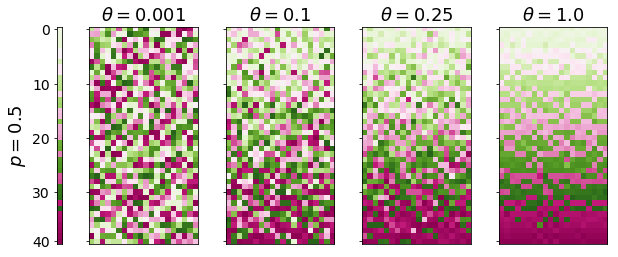

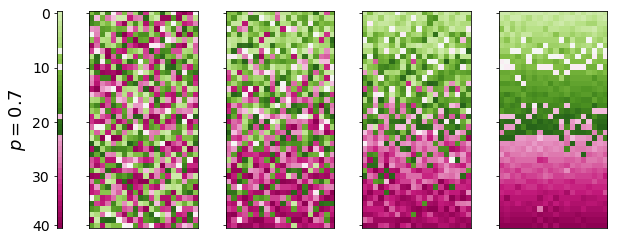

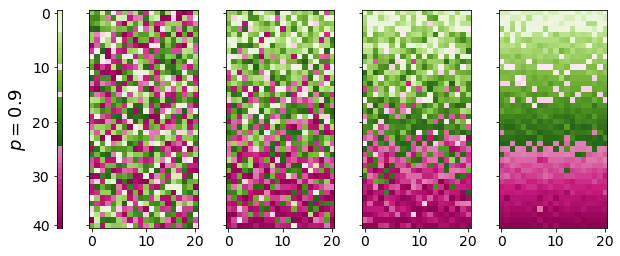

In [15]:
plt.rcParams['figure.figsize'] = 10,4

n_ranks = 20
rank_len = 40

plot_thetas_c(n_ranks,rank_len,0.5,r'$p = 0.5$',"bias_mallows_small5.pdf", ts=True, hidex=True)
plot_thetas_c(n_ranks,rank_len,0.7,r'$p = 0.7$', "bias_mallows_small7.pdf",ts=False, hidex=True)
plot_thetas_c(n_ranks,rank_len,0.9,r'$p = 0.9$',"bias_mallows_small9.pdf",ts=False)

In [16]:
def plot_theta(theta,n_ranks,rank_len,p,ylabel,filename):
    column_labels = list(['RankA','RankB','RankC','RankD','RankE','RankF'])
    row_labels = list(range(1,rank_len+1,1))
    
    ws = [1,6]
    fig, axs = plt.subplots(1, 2,
                            gridspec_kw={'width_ratios':ws})
    groups = gen_groups(rank_len, p)
    g = [] 
    groups_c = [x*i for i,x in enumerate(groups)]
    g.append(groups_c)
    axs[0].imshow(np.transpose(g), cmap='PiYG', interpolation='nearest')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title("My Rank",fontsize=14)
    
    e0, e1 = rank_parity(range(rank_len),[0 if x == -1 else 1 for x in groups])
    par = abs(e0-e1).round(2)
    axs[0].set_xlabel("My fairness score: " +str(par),fontsize=14)
    
    for i in range(rank_len):
        text = axs[0].text(0, i, row_labels[i], ha="center", va="center", color='black')

    r, c = get_ranks_groups_c2(rank_len, n_ranks, groups, p, theta)
    pars = []
    for rank in r:
        rgroup = [0 if groups[int(x-1)] == -1 else 1 for x in rank]
        e0, e1 = rank_parity(rank,[0 if x == -1 else 1 for x in groups])
        pars.append(abs(e0-e1).round(2))
    m_par = np.mean(pars).round(2)
    im = axs[1].imshow(np.transpose(c), cmap='PiYG', interpolation='nearest')
    # put the major ticks at the middle of each cell
    axs[1].set_xticks(np.arange(n_ranks), minor=False)
    axs[1].set_yticks(np.arange(rank_len), minor=False)
    
    xcoords = [float(x) + 0.5 for x in range(n_ranks)]
#     print(xcoords)
    for xc in xcoords:
        plt.axvline(x=xc, c='black')
    axs[1].xaxis.tick_top()

    axs[1].set_xticklabels(column_labels, minor=False,fontsize=12)
#     axs[1].set_yticklabels(row_labels, minor=False)
#     plt.savefig(filename, bbox_inches='tight')
    axs[1].set_yticks([])
    axs[1].set_xlabel("Mean fairness score for R: " + str(m_par), fontsize=14)
    for i in range(rank_len):
        for j in range(n_ranks):
            text = axs[1].text(j, i, row_labels[int(r[j][i])-1],
                           ha="center", va="center", color='black')
#     plt.colorbar(im)
    plt.show()

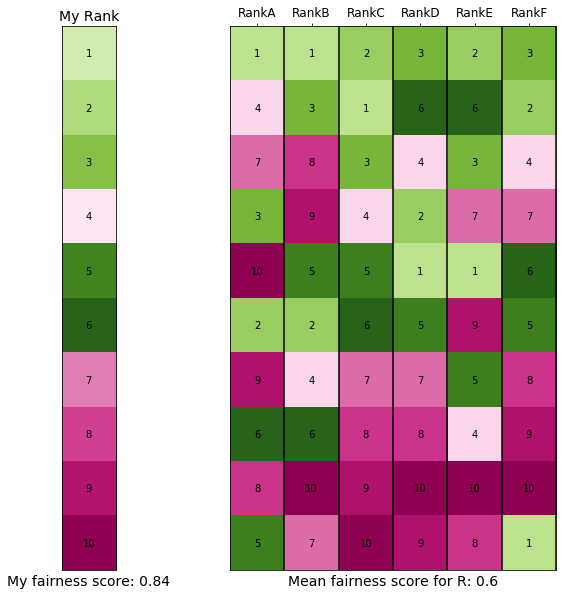

In [18]:
plt.rcParams['figure.figsize'] = 10, 10
plot_theta(0.25,6,10,0.7,r'$p = 0.7$',"tmp.pdf")

this means that when the groups have high consensus and the group distibution in the identity permutation
is very unfair, rankings in R will tend to be unfair

when consensus is low, on average the rankings will be more fair